# Main testing

In [1]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *
from logic import *

In [2]:
# test push_boulder_path (random boulder path)
boulder_path = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]

actions, path = push_boulder_path(boulder_path)

[(-1, 0), (0, 0), (1, -1), (1, 0), (0, 1), (1, 1), (2, 0), (2, 1), (1, 2), (2, 2), (3, 1), (3, 2)]
['S', 'SW', 'E', 'NE', 'S', 'SW', 'E', 'NE', 'S', 'SW', 'E']


## Creazione dell environment

In [50]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                          .............                                         
                          ............    ` }                                   
                          ............` ....}                                   
                          ...........@......}                                   
                          .

In [51]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

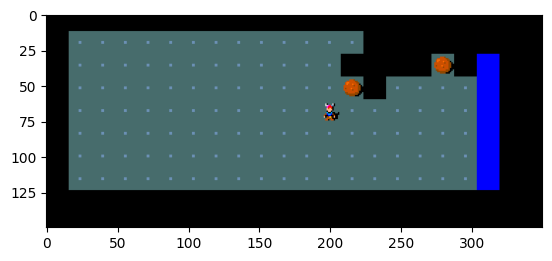

In [52]:
plt.imshow(state['pixel'][100:250, 400:750]) #Immagine ristretta con range [y][x]

In [53]:
game_map = state['chars']
game = state['pixel']

## Finding coordinates
Searching for the coordinates of the player, all the boulders and river

In [54]:
start = get_player_location(game_map)
boulders = get_boulder_locations(game_map)
print("Agent position:", start)


Agent position: (10, 37)


Coordinates of each block present in the map

In [55]:
boulders

[(8, 42), (9, 38)]

Calcolo la distanza del player dal blocco più vicino

In [56]:
target_block_position, distance = get_min_distance_point_to_points(start[0],start[1],boulders)
print("Target position:", target_block_position, "Distance:", distance)

Target position: [9, 38] Distance: 1


### Finding river positions

In [57]:
river_positions = get_river_locations(game_map)

In [58]:
#Lista con le posizioni del fiume
river_positions

[(8, 44), (9, 44), (10, 44), (11, 44), (12, 44), (13, 44)]

In [59]:
k = get_min_distance_point_to_points(boulders[0][0],boulders[0][1], river_positions)

In [60]:
print(k)

([8, 44], 2)


### Getting the coordinates of the best boulder to push

In [61]:
coordinates_min_boulder = get_best_global_distance(start, boulders, river_positions)
print("Coordinates of the best boulder to push: ",coordinates_min_boulder)

[(8, 42, 7), (9, 38, 7)]
Coordinates of the best boulder to push:  (8, 42)


## Complete path player - boulder - river

1) A star calculates the path from the player to the optimal boulder to push
2) A star calculates the path from the boulder reached to the nearest river position

In [62]:
path_player_boulder = a_star(game,game_map, start, coordinates_min_boulder, get_optimal_distance_point_to_point)
print("Complete path to reach the target: ",path_player_boulder)

Target found!
Complete path to reach the target:  [(10, 37), (10, 38), (10, 39), (10, 40), (9, 41)]


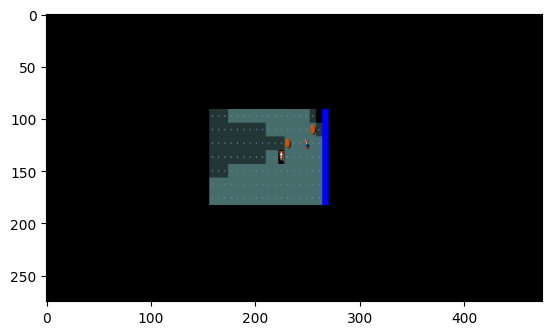

In [63]:
actions, names = actions_from_path(start, path_player_boulder[1:]) #Remove first action because it is the start position
import time

player_pos = plot_animated_sequence(env,game, game_map,actions)


Printing the actions that the player did to reach the target

In [64]:
names

['E', 'E', 'E', 'NE']